<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Zahra Helalizadeh

**Student ID**: 400102193





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [2]:
X, Y = None, None

### START CODE HERE ###
# Reading data from CSV file
df = pd.read_csv('Q3\data_logistic.csv')

# Extracting feature matrix X and target vector Y
Y = df['Y']
X = df.drop(columns=['Y'])

print(X.shape)
print(Y.shape)
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)
(10000, 3)
(10000,)


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Zara\AppData\Local\Temp\ipykernel_16860\3319455137.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('Q3\data_logistic.csv')


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: Normalization of data is essential before training a machine learning model for several reasons:

1. **Scale Consistency**: Normalization ensures that all features have the same scale. Features with larger scales might dominate the learning process and lead to biased model training. By normalizing the data, we bring all features to a similar scale, preventing any single feature from dominating the learning process.

2. **Faster Convergence**: Normalization can help the optimization algorithm converge faster. When features are on different scales, the optimization process may take longer to reach the minimum loss point. Normalizing the data speeds up the convergence process, allowing the algorithm to find the optimal solution more quickly.

3. **Improved Performance**: Normalization can lead to better model performance, especially for algorithms sensitive to feature scales, such as gradient-based optimization methods (e.g., gradient descent). Normalized data can result in a smoother loss landscape, making it easier for the optimization algorithm to find the global minimum.

4. **Regularization Effectiveness**: Some regularization techniques, such as L1 and L2 regularization, assume that all features are on the same scale. Normalizing the data ensures that regularization penalties are applied uniformly across all features, making regularization more effective.

In summary, normalization helps stabilize and improve the training process by ensuring that features are on a consistent scale, leading to faster convergence, better model performance, and more effective regularization.

In [3]:
### START CODE HERE ###
X = (X - X.mean()) / X.std()
### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [4]:
### START CODE HERE ###
m = X.shape[0]
bias_column = pd.Series([1]*m, name='bias')
X = pd.concat([X, bias_column], axis=1)
### END CODE HERE ###
print(X.shape)
X = X.to_numpy()
Y = Y.to_numpy()

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [5]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    return 1 / (1 + np.exp(-Z))
    ### END CODE HERE ###


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [6]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    h = sigmoid(X @ theta)
    loss = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + regLambda * np.sum(theta[1:]**2) / (2 * m)
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:
$$
\frac{\partial \mathcal{J}}{\partial \theta_j} = \sum_{i=1}^{n} (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)})x_j^{(i)} + \lambda \theta_j
$$

In [7]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = np.zeros(n)
    ### START CODE HERE ###
    h = sigmoid(X @ theta)
    grad[0] = np.mean(h - y)
    grad[1:] = (1/m) * X[:, 1:].T @ (h - y) + (regLambda/m) * theta[1:]
    ### END CODE HERE ###
    return grad

# print(computeGradient(np.ones(X.shape[1]), X.to_numpy(), Y.to_numpy(), 0.5))

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [8]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta, loss_history = np.zeros(n), list() 
    ### START CODE HERE ###
    for iter in range(maxNumIters):
        grad = computeGradient(theta, X, y, regLambda)
        theta_old = theta.copy()
        theta -= alpha * grad
        theta_new = theta.copy()
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)
        if hasConverged(theta_old, theta_new, epsilon):
            break
    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###
    return np.linalg.norm(theta_new - theta_old) <= epsilon
    ### END CODE HERE ###

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [9]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###
for iter in range(len(loss_history)):
    loss = loss_history[iter]
    print(f"Loss in iteration {iter}:", loss)
print(theta)
### END CODE HERE ###

Loss in iteration 0: 0.6924958275626217
Loss in iteration 1: 0.6918494173084376
Loss in iteration 2: 0.6912079207867144
Loss in iteration 3: 0.6905713090643338
Loss in iteration 4: 0.6899395532873909
Loss in iteration 5: 0.689312624682813
Loss in iteration 6: 0.6886904945599421
Loss in iteration 7: 0.6880731343120834
Loss in iteration 8: 0.6874605154180184
Loss in iteration 9: 0.6868526094434837
Loss in iteration 10: 0.6862493880426136
Loss in iteration 11: 0.6856508229593518
Loss in iteration 12: 0.6850568860288251
Loss in iteration 13: 0.6844675491786867
Loss in iteration 14: 0.683882784430423
Loss in iteration 15: 0.6833025639006296
Loss in iteration 16: 0.6827268598022517
Loss in iteration 17: 0.6821556444457932
Loss in iteration 18: 0.681588890240494
Loss in iteration 19: 0.6810265696954713
Loss in iteration 20: 0.6804686554208333
Loss in iteration 21: 0.6799151201287585
Loss in iteration 22: 0.6793659366345435
Loss in iteration 23: 0.6788210778576201
Loss in iteration 24: 0.67828

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [10]:

### START CODE HERE ###
def train_val_test_split(X, y, val_size, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= (1 - test_size) * val_size, random_state=42)
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(X, Y, val_size=0.2, test_size=0.1)
### END CODE HERE ###

Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [11]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    z = X @ theta
    h = sigmoid(z)
    n = len(h)
    Y = np.array([1 if h[i] > 0.5 else 0 for i in range(n)])
    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**: The learning rate and regularization constant are crucial hyperparameters that significantly affect the training process and the performance of the logistic regression model. Here's a discussion of their effects and how to find the best values:

- **Learning Rate**:
  - The learning rate controls the step size in the gradient descent optimization algorithm. It determines how quickly or slowly the model parameters are updated during training.
  - If the learning rate is too high, the optimization process may overshoot the optimal solution, causing oscillations or divergence. On the other hand, if it's too low, the training process may be slow, and it might get stuck in local minima.
  - Experimentation is necessary to find the optimal learning rate. Typically, starting with a moderate value and adjusting based on the training progress and loss behavior is a common approach.
  - Techniques like learning rate schedules or adaptive learning rate methods (e.g., Adam, RMSprop) can be used to automatically adjust the learning rate during training based on observed behavior.

- **Regularization Constant**:
  - Regularization is used to prevent overfitting by penalizing large weights in the model. It adds a regularization term to the loss function, which encourages simpler models.
  - A higher regularization constant increases the penalty on large weights, leading to more regularization and simpler models. However, setting it too high may result in underfitting.
  - Conversely, a lower regularization constant reduces the regularization effect, allowing for more complex models. However, setting it too low may lead to overfitting.
  - Cross-validation or grid search techniques can be used to find the optimal value of the regularization constant. These methods involve training the model with different values of the regularization constant and selecting the one that results in the best performance on a validation set.

To find the best values of these parameters, it's common to perform a grid search or random search over a predefined range of values. This involves training multiple models with different combinations of learning rates and regularization constants and evaluating their performance on a validation set. The combination of parameters that results in the best performance can then be selected for final model training and evaluation on a separate test set. Additionally, techniques like learning rate schedules and early stopping can be employed to further fine-tune the training process and improve model performance.

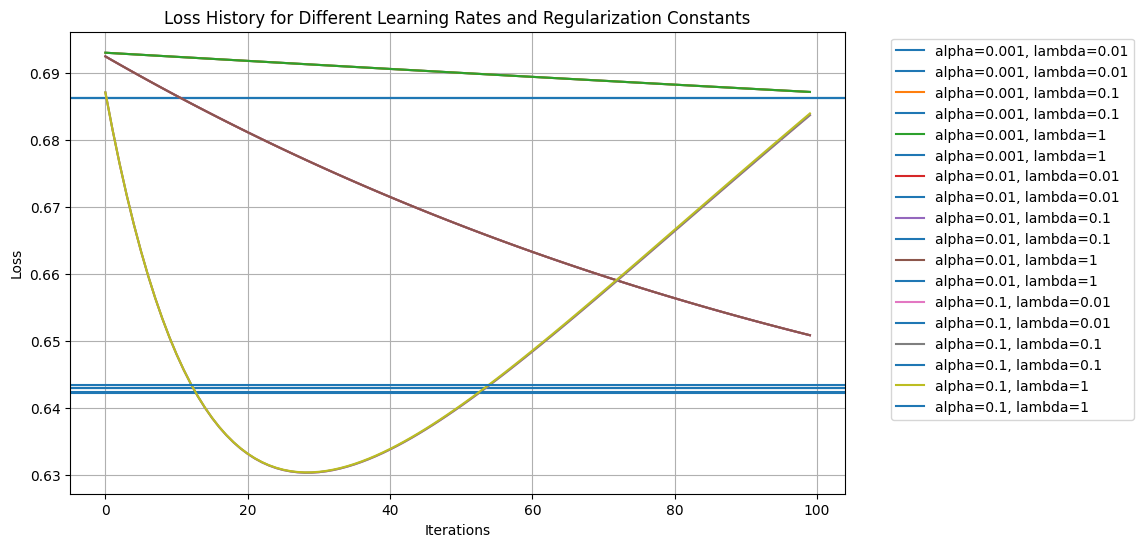

In [12]:
### START CODE HERE ###
learning_rates = [0.001, 0.01, 0.1]
regularization_constants = [0.01, 0.1, 1]

plt.figure(figsize=(10, 6))

for alpha in learning_rates:
    for lambda_val in regularization_constants:
        # Fit the model
        theta, loss_history = fit(X_train, y_train, alpha=alpha, regLambda=lambda_val)
        
        # Predict on train and test data
        y_pred_test = predict(X_test, theta)
        test_loss = computeCost(theta, X_test, y_test, lambda_val)
        
        # Plot loss history
        plt.plot(loss_history, label=f"alpha={alpha}, lambda={lambda_val}")
        plt.axhline(test_loss, label=f"alpha={alpha}, lambda={lambda_val}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss History for Different Learning Rates and Regularization Constants")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [13]:
### START CODE HERE ###
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming you have X_train, X_test, y_train, y_test from previous steps

# Create Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training set
nb_classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Gaussian Naive Bayes classifier on test set:", accuracy)

### END CODE HERE ###

Accuracy of Gaussian Naive Bayes classifier on test set: 0.956


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [14]:
### START CODE HERE ###
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming you have X_train, X_test, y_train, y_test from previous steps

# Create Linear Discriminant Analysis classifier
lda_classifier = LinearDiscriminantAnalysis()

# Train the classifier on the training set
lda_classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred = lda_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Linear Discriminant Analysis classifier on test set:", accuracy)

### END CODE HERE ###

Accuracy of Linear Discriminant Analysis classifier on test set: 0.988


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: Based on the accuracies:

- Gaussian Naive Bayes classifier: Accuracy on the test set = 0.956
- Linear Discriminant Analysis classifier: Accuracy on the test set = 0.988

The Linear Discriminant Analysis (LDA) classifier appears to be the better method for classifying this dataset, as it achieved a higher accuracy of 0.988 compared to the Gaussian Naive Bayes classifier's accuracy of 0.956 on the test set.

Therefore, the best method for classifying this dataset is the Linear Discriminant Analysis classifier, which achieved the highest accuracy of 0.988 on the test set.